# D’oh, Simpson’s Paradox

Simpson’s Paradox: when a trend that appears in several different groups of data but disappears or reverses when these groups are combined

## Initializing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Which Movie is Better
Me and Arya are debating over which movie is better The Kissing Booth (Arya’s Choice) or Spectral (My Choice). Data of ratings

In [2]:
movie = pd.DataFrame({'The Kissing Booth Rating': [5.1, 7.6], 'The Kissing Booth Reviews': [280, 120], 'Spectral Rating': [4.1, 7.2],  'Spectral Reviews': [90, 310]}, index = ['Male', 'Female'])
movie

,The Kissing Booth Rating,The Kissing Booth Reviews,Spectral Rating,Spectral Reviews
Male,5.1,280,4.1,90
Female,7.6,120,7.2,310


In [3]:
total_rating_kb = (movie['The Kissing Booth Rating'] * movie['The Kissing Booth Reviews']).sum() / movie['The Kissing Booth Reviews'].sum()
total_review_kb = movie['The Kissing Booth Reviews'].sum()
total_rating_sp = (movie['Spectral Rating'] * movie['Spectral Reviews']).sum() / movie['Spectral Reviews'].sum()
total_review_sp = movie['Spectral Reviews'].sum()

movie = movie.append(pd.DataFrame({'The Kissing Booth Rating': [total_rating_kb], 'The Kissing Booth Reviews': [total_review_kb], 'Spectral Rating': [total_rating_sp], 'Spectral Reviews': [total_review_sp]}, index = ['Total'])).round(2)
movie


,The Kissing Booth Rating,The Kissing Booth Reviews,Spectral Rating,Spectral Reviews
Male,5.10,280,4.1,90
Female,7.60,120,7.2,310
Total,5.85,400,6.5,400


## Spooky Correlation
Lets dive into a detailed example, making sense of Probability of Eye Problem vs Smartphone Usage

In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
samples = 50
np.random.seed(25)


ages = np.random.randint(13, 19, samples)
phone_usage = np.random.randint(6, 10, samples) + np.random.randn(samples)
p_teen = 10 + 0.6 * ages + 1.1 * phone_usage + np.random.randn(samples) 
teenagers = pd.DataFrame({'age': ages, 'Phone Usage': phone_usage, 'probability': p_teen})

ages = np.random.randint(20, 30, samples)
phone_usage = np.random.randint(2, 5, samples) + np.random.randn(samples) 
p_adult = 17 + 0.5 * ages + 1.1 * phone_usage + np.random.randn(samples) 
young_adults = pd.DataFrame({'age': ages, 'Phone Usage': phone_usage, 'probability': p_adult})

### Probability of Eye Issues Vs Smart Phone Usage [Teenagers]

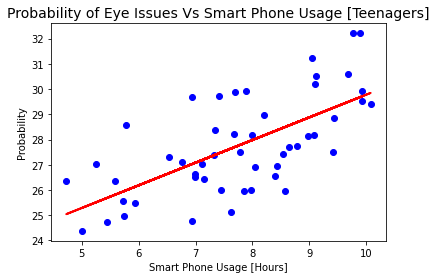

In [3]:
regressor.fit(teenagers['Phone Usage'].values.reshape(-1,1), teenagers['probability'].values.reshape(-1,1))
y_pred = regressor.predict(teenagers['Phone Usage'].values.reshape(-1,1))
plt.scatter(teenagers['Phone Usage'], teenagers['probability'],  color='blue')
plt.plot(teenagers['Phone Usage'], y_pred, color='red', linewidth=2)
plt.title('Probability of Eye Issues Vs Smart Phone Usage [Teenagers]', fontsize = 14,  color = 'k')
plt.xlabel('Smart Phone Usage [Hours]', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.show()

### Probability of Eye Issues Vs Smart Phone Usage [Young Adults]

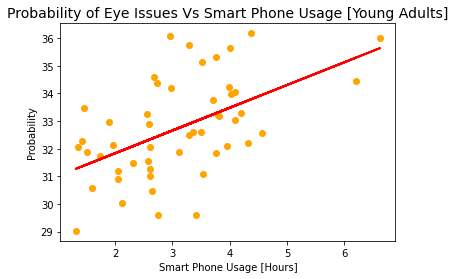

In [4]:
regressor.fit(young_adults['Phone Usage'].values.reshape(-1,1), young_adults['probability'].values.reshape(-1,1))
y_pred = regressor.predict(young_adults['Phone Usage'].values.reshape(-1,1))
plt.scatter(young_adults['Phone Usage'], young_adults['probability'],  color='orange')
plt.plot(young_adults['Phone Usage'], y_pred, color='red', linewidth=2)
plt.title('Probability of Eye Issues Vs Smart Phone Usage [Young Adults]', fontsize = 14,  color = 'k')
plt.xlabel('Smart Phone Usage [Hours]', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.show()

### Probability of Eye Issues Vs Smart Phone Usage [Overall]

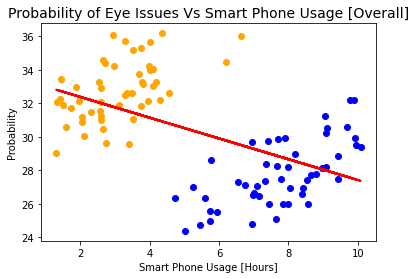

In [5]:
combined= pd.concat([teenagers, young_adults], axis = 0)
regressor.fit(combined['Phone Usage'].values.reshape(-1,1), combined['probability'].values.reshape(-1,1))
y_pred = regressor.predict(combined['Phone Usage'].values.reshape(-1,1))
plt.scatter(teenagers['Phone Usage'], teenagers['probability'],  color='blue')
plt.scatter(young_adults['Phone Usage'], young_adults['probability'],  color='orange')
plt.plot(combined['Phone Usage'], y_pred, color='red', linewidth=2)
plt.title('Probability of Eye Issues Vs Smart Phone Usage [Overall]', fontsize = 14,  color = 'k')
plt.xlabel('Smart Phone Usage [Hours]', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.show()

### Probability of Eye Issues Vs Age [Teenagers]

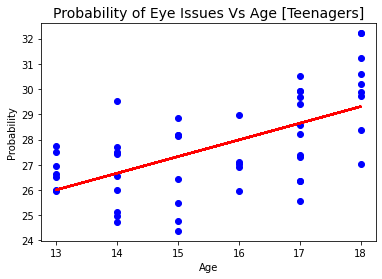

In [6]:
regressor.fit(teenagers['age'].values.reshape(-1,1), teenagers['probability'].values.reshape(-1,1))
y_pred = regressor.predict(teenagers['age'].values.reshape(-1,1))
plt.scatter(teenagers['age'], teenagers['probability'],  color='blue')
plt.plot(teenagers['age'], y_pred, color='red', linewidth=2)
plt.title('Probability of Eye Issues Vs Age [Teenagers]', fontsize = 14,  color = 'k')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.show()

### Probability of Eye Issues Vs Age [Young Adults]

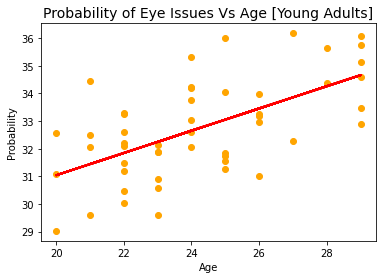

In [7]:
regressor.fit(young_adults['age'].values.reshape(-1,1), young_adults['probability'].values.reshape(-1,1))
y_pred = regressor.predict(young_adults['age'].values.reshape(-1,1))
plt.scatter(young_adults['age'], young_adults['probability'],  color='orange')
plt.plot(young_adults['age'], y_pred, color='red', linewidth=2)
plt.title('Probability of Eye Issues Vs Age [Young Adults]', fontsize = 14,  color = 'k')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.show()

### Probability of Eye Issues Vs Age [Overall]

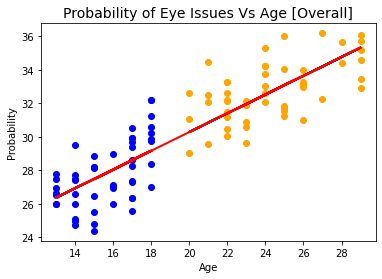

In [8]:
combined= pd.concat([teenagers, young_adults], axis = 0)
regressor.fit(combined['age'].values.reshape(-1,1), combined['probability'].values.reshape(-1,1))
y_pred = regressor.predict(combined['age'].values.reshape(-1,1))
plt.scatter(teenagers['age'], teenagers['probability'],  color='blue')
plt.scatter(young_adults['age'], young_adults['probability'],  color='orange')
plt.plot(combined['age'], y_pred, color='red', linewidth=2)
plt.title('Probability of Eye Issues Vs Age [Overall]', fontsize = 14,  color = 'k')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.show()